# Librerias 

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import ks_2samp
from varclushi import VarClusHi
import seaborn as sns
import matplotlib.pyplot as plt

# Lectura de datos

In [2]:
df1 = pd.read_csv('contaminantes_2018.csv',skiprows=10)
df2 = pd.read_csv('contaminantes_2019.csv',skiprows=10)
df3 = pd.read_csv('contaminantes_2020.csv',skiprows=10)
df4 = pd.read_csv('contaminantes_2021.csv',skiprows=10)
df5 = pd.read_csv('contaminantes_2022.csv',skiprows=10)

df = pd.concat([df1, df2, df3, df4, df5])



In [3]:

df.head(10)   #te muestra los primeros 10

,date,id_station,id_parameter,value,unit
0,01/01/2018 01:00,ACO,CO,0.4,15
1,01/01/2018 01:00,ACO,NO,3.0,1
2,01/01/2018 01:00,ACO,NO2,23.0,1
3,01/01/2018 01:00,ACO,NOX,25.0,1
4,01/01/2018 01:00,ACO,O3,8.0,1
5,01/01/2018 01:00,ACO,PM10,125.0,2
6,01/01/2018 01:00,ACO,SO2,2.0,1
7,01/01/2018 01:00,AJU,O3,17.0,1
8,01/01/2018 01:00,AJU,PM2.5,49.0,2
9,01/01/2018 01:00,ATI,CO,0.8,15


In [4]:
df.sample(10) # te muestra una muestra aleatoria de 10 filas

,date,id_station,id_parameter,value,unit
1260705,05/08/2018 05:00,CAM,PM10,10.0,2
1133885,30/06/2020 01:00,NEZ,CO,NaN,15
1012556,11/06/2021 07:00,CHO,CO,1.9,15
1272703,22/07/2020 05:00,HGM,NOX,9.0,1
455512,13/03/2020 18:00,HGM,NOX,18.0,1
1871497,25/10/2020 19:00,SFE,NO,5.0,1
1158852,18/07/2018 17:00,BJU,O3,78.0,1
744990,08/05/2018 18:00,XAL,SO2,10.0,1
1150063,06/07/2019 19:00,LLA,SO2,NaN,1
848866,16/05/2021 06:00,MER,CO,NaN,15


In [5]:
df.shape  # te informa cuantas filas y columnas tiene nuestro dataframe

(9931032, 5)

In [6]:
df.dtypes
#  -En este caso, se tiene un dataframe con cinco columnas: "date", "id_station", "id_parameter", "value" y "unit"

#  -La columna "date", "id_station" y "id_parameter" son de tipo object, lo que indica que pueden contener
#   cualquier tipo de valor, incluyendo cadenas y números.
#  -La columna "value" es de tipo float64, lo que indica que contiene valores numéricos de punto flotante.(decimal)
#  -Por último, la columna "unit" es de tipo int64, lo que indica que contiene valores numéricos enteros.

date             object
id_station       object
id_parameter     object
value           float64
unit              int64
dtype: object

In [7]:
df = df.pivot_table( index   = ['id_station','date'] , 
                     columns = ['id_parameter'] , 
                     values  = ['value'] ).reset_index() 
#Aqui pivoteamos la tabla

In [8]:
df.head()

id_station              date value                                \
id_parameter                                 CO   NO   NO2   NOX    O3   PM10   
0                   ACO  01/01/2018 01:00   0.4  3.0  23.0  25.0   8.0  125.0   
1                   ACO  01/01/2018 02:00   0.4  2.0  19.0  21.0  13.0   98.0   
2                   ACO  01/01/2018 03:00   0.4  2.0  15.0  17.0  15.0   88.0   
3                   ACO  01/01/2018 04:00   0.4  2.0  14.0  15.0  20.0   82.0   
4                   ACO  01/01/2018 05:00   0.4  2.0  14.0  16.0  16.0   96.0   

                              
id_parameter PM2.5 PMCO  SO2  
0              NaN  NaN  2.0  
1              NaN  NaN  3.0  
2              NaN  NaN  3.0  
3              NaN  NaN  3.0  
4              NaN  NaN  4.0

# INspeccion/ Exploracion/Pretatamiento

In [9]:
df.columns = [c[0] if c[1] == '' else c[0][:1]+'_'+c[1] for c in df.columns]

In [10]:
df.head()

,id_station,date,v_CO,v_NO,v_NO2,v_NOX,v_O3,v_PM10,v_PM2.5,v_PMCO,v_SO2
0,ACO,01/01/2018 01:00,0.4,3.0,23.0,25.0,8.0,125.0,NaN,NaN,2.0
1,ACO,01/01/2018 02:00,0.4,2.0,19.0,21.0,13.0,98.0,NaN,NaN,3.0
2,ACO,01/01/2018 03:00,0.4,2.0,15.0,17.0,15.0,88.0,NaN,NaN,3.0
3,ACO,01/01/2018 04:00,0.4,2.0,14.0,15.0,20.0,82.0,NaN,NaN,3.0
4,ACO,01/01/2018 05:00,0.4,2.0,14.0,16.0,16.0,96.0,NaN,NaN,4.0


In [11]:
df['fh'] = df['date'].map( lambda x: x.split(' ')[0] )

In [12]:
df['fh'] = pd.to_datetime( df['fh'] , format='%d/%m/%Y' )

In [13]:
df['hrs'] = df['date'].map( lambda x: x.split(' ')[1].split(':')[0] )

In [14]:
df.rename( columns = {'v_PM10':'PM10'} , inplace=True ) #Aqui renombramos nuestro vector solucion 

In [15]:
df.shape

(1074321, 13)

In [16]:
df = df.loc[ ~df.PM10.isna() ].reset_index(drop=True) # localizamos los valores vacios de nuestra varible objetivo
                                                      

In [17]:
df.shape

(603438, 13)

In [18]:
df

,id_station,date,v_CO,v_NO,v_NO2,v_NOX,v_O3,PM10,v_PM2.5,v_PMCO,v_SO2,fh,hrs
0,ACO,01/01/2018 01:00,0.4,3.0,23.0,25.0,8.0,125.0,NaN,NaN,2.0,2018-01-01,01
1,ACO,01/01/2018 02:00,0.4,2.0,19.0,21.0,13.0,98.0,NaN,NaN,3.0,2018-01-01,02
2,ACO,01/01/2018 03:00,0.4,2.0,15.0,17.0,15.0,88.0,NaN,NaN,3.0,2018-01-01,03
3,ACO,01/01/2018 04:00,0.4,2.0,14.0,15.0,20.0,82.0,NaN,NaN,3.0,2018-01-01,04
4,ACO,01/01/2018 05:00,0.4,2.0,14.0,16.0,16.0,96.0,NaN,NaN,4.0,2018-01-01,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
603433,XAL,31/12/2018 20:00,0.9,14.0,46.0,59.0,14.0,97.0,32.0,65.0,7.0,2018-12-31,20
603434,XAL,31/12/2018 21:00,1.0,27.0,39.0,65.0,7.0,90.0,34.0,56.0,3.0,2018-12-31,21
603435,XAL,31/12/2018 22:00,1.0,37.0,38.0,74.0,6.0,76.0,28.0,47.0,3.0,2018-12-31,22
603436,XAL,31/12/2018 23:00,1.1,41.0,36.0,76.0,5.0,91.0,43.0,48.0,3.0,2018-12-31,23


# Variables

In [19]:
um = ['id_station','fh'] # de estas vamos a sacar nuestra unidad muestral
tgt = ['PM10']           # esta es nuestra variable objetivo
varc = df.filter(like='v_').columns.to_list()  # nuestras variables coninuas

# Ingenieria de variables


In [20]:
for i in varc:
    for j in varc:
        if i != j:
            df[f'v_{i[2:]}_{j[2:]}_ratio'] = np.where( df[j] != 0 , df[i] / df[j] , np.nan )
# Aca creamos un ratio entre nuestras variables continuas

In [21]:
df


,id_station,date,v_CO,v_NO,v_NO2,v_NOX,v_O3,PM10,v_PM2.5,v_PMCO,...,v_PMCO_O3_ratio,v_PMCO_PM2.5_ratio,v_PMCO_SO2_ratio,v_SO2_CO_ratio,v_SO2_NO_ratio,v_SO2_NO2_ratio,v_SO2_NOX_ratio,v_SO2_O3_ratio,v_SO2_PM2.5_ratio,v_SO2_PMCO_ratio
0,ACO,01/01/2018 01:00,0.4,3.0,23.0,25.0,8.0,125.0,NaN,NaN,...,NaN,NaN,NaN,5.000000,0.666667,0.086957,0.080000,0.250000,NaN,NaN
1,ACO,01/01/2018 02:00,0.4,2.0,19.0,21.0,13.0,98.0,NaN,NaN,...,NaN,NaN,NaN,7.500000,1.500000,0.157895,0.142857,0.230769,NaN,NaN
2,ACO,01/01/2018 03:00,0.4,2.0,15.0,17.0,15.0,88.0,NaN,NaN,...,NaN,NaN,NaN,7.500000,1.500000,0.200000,0.176471,0.200000,NaN,NaN
3,ACO,01/01/2018 04:00,0.4,2.0,14.0,15.0,20.0,82.0,NaN,NaN,...,NaN,NaN,NaN,7.500000,1.500000,0.214286,0.200000,0.150000,NaN,NaN
4,ACO,01/01/2018 05:00,0.4,2.0,14.0,16.0,16.0,96.0,NaN,NaN,...,NaN,NaN,NaN,10.000000,2.000000,0.285714,0.250000,0.250000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603433,XAL,31/12/2018 20:00,0.9,14.0,46.0,59.0,14.0,97.0,32.0,65.0,...,4.642857,2.031250,9.285714,7.777778,0.500000,0.152174,0.118644,0.500000,0.218750,0.107692
603434,XAL,31/12/2018 21:00,1.0,27.0,39.0,65.0,7.0,90.0,34.0,56.0,...,8.000000,1.647059,18.666667,3.000000,0.111111,0.076923,0.046154,0.428571,0.088235,0.053571
603435,XAL,31/12/2018 22:00,1.0,37.0,38.0,74.0,6.0,76.0,28.0,47.0,...,7.833333,1.678571,15.666667,3.000000,0.081081,0.078947,0.040541,0.500000,0.107143,0.063830
603436,XAL,31/12/2018 23:00,1.1,41.0,36.0,76.0,5.0,91.0,43.0,48.0,...,9.600000,1.116279,16.000000,2.727273,0.073171,0.083333,0.039474,0.600000,0.069767,0.062500


In [22]:
pd.set_option('display.max_columns',200) # pa ver todas las columnas 

In [23]:
df

,id_station,date,v_CO,v_NO,v_NO2,v_NOX,v_O3,PM10,v_PM2.5,v_PMCO,v_SO2,fh,hrs,v_CO_NO_ratio,v_CO_NO2_ratio,v_CO_NOX_ratio,v_CO_O3_ratio,v_CO_PM2.5_ratio,v_CO_PMCO_ratio,v_CO_SO2_ratio,v_NO_CO_ratio,v_NO_NO2_ratio,v_NO_NOX_ratio,v_NO_O3_ratio,v_NO_PM2.5_ratio,v_NO_PMCO_ratio,v_NO_SO2_ratio,v_NO2_CO_ratio,v_NO2_NO_ratio,v_NO2_NOX_ratio,v_NO2_O3_ratio,v_NO2_PM2.5_ratio,v_NO2_PMCO_ratio,v_NO2_SO2_ratio,v_NOX_CO_ratio,v_NOX_NO_ratio,v_NOX_NO2_ratio,v_NOX_O3_ratio,v_NOX_PM2.5_ratio,v_NOX_PMCO_ratio,v_NOX_SO2_ratio,v_O3_CO_ratio,v_O3_NO_ratio,v_O3_NO2_ratio,v_O3_NOX_ratio,v_O3_PM2.5_ratio,v_O3_PMCO_ratio,v_O3_SO2_ratio,v_PM2.5_CO_ratio,v_PM2.5_NO_ratio,v_PM2.5_NO2_ratio,v_PM2.5_NOX_ratio,v_PM2.5_O3_ratio,v_PM2.5_PMCO_ratio,v_PM2.5_SO2_ratio,v_PMCO_CO_ratio,v_PMCO_NO_ratio,v_PMCO_NO2_ratio,v_PMCO_NOX_ratio,v_PMCO_O3_ratio,v_PMCO_PM2.5_ratio,v_PMCO_SO2_ratio,v_SO2_CO_ratio,v_SO2_NO_ratio,v_SO2_NO2_ratio,v_SO2_NOX_ratio,v_SO2_O3_ratio,v_SO2_PM2.5_ratio,v_SO2_PMCO_ratio
0,ACO,01/01/2018 01:00,0.4,3.0,23.0,25.0,8.0,125.0,NaN,NaN,2.0,2018-01-01,01,0.133333,0.017391,0.016000,0.050000,NaN,NaN,0.200000,7.500000,0.130435,0.120000,0.375000,NaN,NaN,1.500000,57.500000,7.666667,0.920000,2.875000,NaN,NaN,11.500000,62.500000,8.333333,1.086957,3.125000,NaN,NaN,12.500000,20.000000,2.666667,0.347826,0.320000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,0.666667,0.086957,0.080000,0.250000,NaN,NaN
1,ACO,01/01/2018 02:00,0.4,2.0,19.0,21.0,13.0,98.0,NaN,NaN,3.0,2018-01-01,02,0.200000,0.021053,0.019048,0.030769,NaN,NaN,0.133333,5.000000,0.105263,0.095238,0.153846,NaN,NaN,0.666667,47.500000,9.500000,0.904762,1.461538,NaN,NaN,6.333333,52.500000,10.500000,1.105263,1.615385,NaN,NaN,7.000000,32.500000,6.500000,0.684211,0.619048,NaN,NaN,4.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.500000,1.500000,0.157895,0.142857,0.230769,NaN,NaN
2,ACO,01/01/2018 03:00,0.4,2.0,15.0,17.0,15.0,88.0,NaN,NaN,3.0,2018-01-01,03,0.200000,0.026667,0.023529,0.026667,NaN,NaN,0.133333,5.000000,0.133333,0.117647,0.133333,NaN,NaN,0.666667,37.500000,7.500000,0.882353,1.000000,NaN,NaN,5.000000,42.500000,8.500000,1.133333,1.133333,NaN,NaN,5.666667,37.500000,7.500000,1.000000,0.882353,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.500000,1.500000,0.200000,0.176471,0.200000,NaN,NaN
3,ACO,01/01/2018 04:00,0.4,2.0,14.0,15.0,20.0,82.0,NaN,NaN,3.0,2018-01-01,04,0.200000,0.028571,0.026667,0.020000,NaN,NaN,0.133333,5.000000,0.142857,0.133333,0.100000,NaN,NaN,0.666667,35.000000,7.000000,0.933333,0.700000,NaN,NaN,4.666667,37.500000,7.500000,1.071429,0.750000,NaN,NaN,5.000000,50.000000,10.000000,1.428571,1.333333,NaN,NaN,6.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.500000,1.500000,0.214286,0.200000,0.150000,NaN,NaN
4,ACO,01/01/2018 05:00,0.4,2.0,14.0,16.0,16.0,96.0,NaN,NaN,4.0,2018-01-01,05,0.200000,0.028571,0.025000,0.025000,NaN,NaN,0.100000,5.000000,0.142857,0.125000,0.125000,NaN,NaN,0.500000,35.000000,7.000000,0.875000,0.875000,NaN,NaN,3.500000,40.000000,8.000000,1.142857,1.000000,NaN,NaN,4.000000,40.000000,8.000000,1.142857,1.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,2.000000,0.285714,0.250000,0.250000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603433,XAL,31/12/2018 20:00,0.9,14.0,46.0,59.0,14.0,97.0,32.0,65.0,7.0,2018-12-31,20,0.064286,0.019565,0.015254,0.064286,0.028125,0.013846,0.128571,15.555556,0.304348,0.237288,1.000000,0.437500,0.215385,2.000000,51.111111,3.285714,0.779661,3.285714,1.437500,0.707692,6.571429,65.555556,4.214286,1.282609,4.214286,1.843750,0.907692,8.428571,15.555556,1.000000,0.304348,0.237288,0.437500,0.215385,2.000000,35.555556,2.285714,0.695652,0.542373,2.285714,0.492308,4.571429,72.2

In [24]:
df.shape

(603438, 69)

In [25]:
varc = df.filter(like='v_').columns.to_list() # recalculamos nuestras variables continuas, ya que se añadieron
                                              # las nuevas despues de generar los ratios

In [26]:
df = df.groupby(um)[varc + tgt].mean().reset_index() #sacar media por cada dia por cada estacion

In [27]:
df

,id_station,fh,v_CO,v_NO,v_NO2,v_NOX,v_O3,v_PM2.5,v_PMCO,v_SO2,v_CO_NO_ratio,v_CO_NO2_ratio,v_CO_NOX_ratio,v_CO_O3_ratio,v_CO_PM2.5_ratio,v_CO_PMCO_ratio,v_CO_SO2_ratio,v_NO_CO_ratio,v_NO_NO2_ratio,v_NO_NOX_ratio,v_NO_O3_ratio,v_NO_PM2.5_ratio,v_NO_PMCO_ratio,v_NO_SO2_ratio,v_NO2_CO_ratio,v_NO2_NO_ratio,v_NO2_NOX_ratio,v_NO2_O3_ratio,v_NO2_PM2.5_ratio,v_NO2_PMCO_ratio,v_NO2_SO2_ratio,v_NOX_CO_ratio,v_NOX_NO_ratio,v_NOX_NO2_ratio,v_NOX_O3_ratio,v_NOX_PM2.5_ratio,v_NOX_PMCO_ratio,v_NOX_SO2_ratio,v_O3_CO_ratio,v_O3_NO_ratio,v_O3_NO2_ratio,v_O3_NOX_ratio,v_O3_PM2.5_ratio,v_O3_PMCO_ratio,v_O3_SO2_ratio,v_PM2.5_CO_ratio,v_PM2.5_NO_ratio,v_PM2.5_NO2_ratio,v_PM2.5_NOX_ratio,v_PM2.5_O3_ratio,v_PM2.5_PMCO_ratio,v_PM2.5_SO2_ratio,v_PMCO_CO_ratio,v_PMCO_NO_ratio,v_PMCO_NO2_ratio,v_PMCO_NOX_ratio,v_PMCO_O3_ratio,v_PMCO_PM2.5_ratio,v_PMCO_SO2_ratio,v_SO2_CO_ratio,v_SO2_NO_ratio,v_SO2_NO2_ratio,v_SO2_NOX_ratio,v_SO2_O3_ratio,v_SO2_PM2.5_ratio,v_SO2_PMCO_ratio,PM10
0,ACO,2018-01-01,0.237500,2.000000,12.875000,14.750000,14.291667,NaN,NaN,1.583333,0.118056,0.018796,0.016159,0.021586,NaN,NaN,0.158333,10.868056,0.173730,0.146759,0.187860,NaN,NaN,1.541667,66.736111,6.625000,0.862210,1.296302,NaN,NaN,9.666667,77.395833,7.611111,1.164429,1.469520,NaN,NaN,11.152778,87.083333,7.659722,1.490244,1.222494,NaN,NaN,10.687500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.395833,0.812500,0.131808,0.112715,0.132601,NaN,NaN,54.125000
1,ACO,2018-01-02,0.329167,8.666667,18.541667,27.250000,9.041667,NaN,NaN,1.125000,0.073653,0.018078,0.012346,0.163623,NaN,NaN,0.312500,22.666667,0.465344,0.273693,5.382906,NaN,NaN,8.229167,59.054563,4.901662,0.722047,8.498385,NaN,NaN,17.625000,82.033730,5.952282,1.470282,13.934918,NaN,NaN,25.895833,40.552579,5.317378,0.603589,0.509111,NaN,NaN,8.187500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.149802,0.336335,0.071548,0.051578,0.428632,NaN,NaN,54.666667
2,ACO,2018-01-03,0.354167,13.208333,20.375000,33.583333,15.791667,NaN,NaN,2.791667,0.054367,0.017369,0.010742,0.171604,NaN,NaN,0.234396,29.701885,0.612250,0.309070,8.591857,NaN,NaN,9.217965,68.062500,4.255755,0.691393,7.958443,NaN,NaN,13.626434,97.753472,5.253539,1.611333,16.529467,NaN,NaN,22.844399,82.021329,5.970236,1.063806,0.875968,NaN,NaN,6.202958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.723214,0.855660,0.158609,0.124757,0.539208,NaN,NaN,69.208333
3,ACO,2018-01-04,0.383333,14.958333,27.166667,42.000000,11.916667,NaN,NaN,3.166667,0.061245,0.014688,0.009952,0.165417,NaN,NaN,0.172569,35.927083,0.545899,0.284363,10.260180,NaN,NaN,6.314236,83.222222,4.702124,0.720348,12.919710,NaN,NaN,11.876736,118.840278,5.660456,1.539693,23.132911,NaN,NaN,18.145833,42.364583,4.970358,0.616412,0.530620,NaN,NaN,3.987847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.736111,0.665956,0.124371,0.092275,1.137262,NaN,NaN,79.291667
4,ACO,2018-01-05,0.354545,8.428571,22.190476,30.619048,12.952381,NaN,NaN,1.882353,0.087586,0.015803,0.011650,0.105033,NaN,NaN,0.248431,19.003968,0.351050,0.215036,3.830771,NaN,NaN,6.690196,71.122449,6.516885,0.784168,5.897230,NaN,NaN,15.666667,90.285147,7.560536,1.352104,9.725874,NaN,NaN,22.366667,49.335601,6.183644,0.711898,0.613585,NaN,NaN,6.484314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021008,0.563339,0.095243,0.074965,0.365369,NaN,NaN,79.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26498,XAL,2019-12-13,0.991667,73.083333,37.625000,110.541667,16.750000,27.041667,58.666667,3.708333,0.025392,0.025961,0.008273,0.390098,0.039828,0.016514,0.262976,60.674487,2.012916,0.491006,34.073411,2.998251,1.238328,18.136508,74.436657,2.206061,0.513041,10.661916,1.773511,0.740256,13.533780,134.325325,3.183515,3.005713,44.649844,4.763798,1.974433,31.587351,71.032774,2.723732,0.543292,0.4329

In [28]:
df = df.loc[ (~df.fh.isnull() ) ].reset_index(drop=True) #quitamos alv los valores vacios de la columna fh (fechas) 

In [29]:
df.shape

(26503, 67)

# Catalogo de fechas (vamos a trabajar con ventanas de tiempo)

In [30]:
cat_fh = df[['fh']].drop_duplicates().reset_index(drop=True)
    
    # -df[['fh']]: selecciona la columna 'fh' del DataFrame 'df' y devuelve un nuevo DataFrame con una sola columna.
    # -drop_duplicates(): elimina todas las filas duplicadas del DataFrame resultante,
    #  es decir, deja solo una fila para cada valor único en la columna 'fh'.
    # -reset_index(drop=True): resetea el índice del DataFrame resultante para comenzar desde cero y 
    #  descarta el índice anterior.

In [31]:
cat_fh['fh'] = sorted( cat_fh['fh'] )

    # -cat_fh['fh']: selecciona la columna 'fh' del DataFrame 'cat_fh'.
    # -sorted( cat_fh['fh'] ): ordena los valores de la columna 'fh' en orden 
    #  ascendente utilizando la función sorted().

In [32]:
cat_fh['ancla'] = cat_fh.index + 1 #creamos nuestra ancla

In [33]:
cat_fh

,fh,ancla
0,2018-01-01,1
1,2018-01-02,2
2,2018-01-03,3
3,2018-01-04,4
4,2018-01-05,5
...,...,...
1607,2022-05-27,1608
1608,2022-05-28,1609
1609,2022-05-29,1610
1610,2022-05-30,1611


In [34]:
( cat_fh['fh'].max() - cat_fh['fh'].min()  ) / np.timedelta64(1,'D') #calculamos el numero de fechas

1611.0

# Ventanas de tiempo 

In [35]:
vobs = 6   # ventanas de observacion
vdes = 1   # ventanas de desempeño ¿cuantos dias queremos pronosticar?

fh_ini = cat_fh['ancla'].min() #fecha de inicio
fh_fin = cat_fh['ancla'].max() #fehca final
 
print( fh_ini , fh_fin )

ancla_i = fh_ini + vobs - 1
ancla_f = fh_fin - vdes

print( ancla_i , ancla_f )

#El resultado del código muestra que la serie de tiempo tiene un total de 1612 días. 
#La ventana de observación se extiende desde el día 6 hasta el día 1611, y la ventana de 
#desempeño se extiende desde el día 1 hasta el día 1611. Por lo tanto, los modelos de pronóstico 
#utilizarán los datos de los 6 días anteriores (ventana de observación) para predecir los 
#datos del día 7 (ventana de desempeño), y así sucesivamente hasta llegar al día 1611.

1 1612
6 1611


In [36]:
df = df.merge(cat_fh , on = ['fh'] , how='inner').reset_index(drop=True)
# En resumen, esta línea de código combina los datos de dos DataFrames en 
# uno solo, utilizando la columna "fh" como clave de unión.

In [37]:
um = ['id_station','ancla'] #cambiamos la unidas muestral

In [38]:
df.shape

(26503, 68)

In [39]:
X = df[um + varc + tgt].copy() #TAD pree-preeliminar

In [40]:
X

,id_station,ancla,v_CO,v_NO,v_NO2,v_NOX,v_O3,v_PM2.5,v_PMCO,v_SO2,v_CO_NO_ratio,v_CO_NO2_ratio,v_CO_NOX_ratio,v_CO_O3_ratio,v_CO_PM2.5_ratio,v_CO_PMCO_ratio,v_CO_SO2_ratio,v_NO_CO_ratio,v_NO_NO2_ratio,v_NO_NOX_ratio,v_NO_O3_ratio,v_NO_PM2.5_ratio,v_NO_PMCO_ratio,v_NO_SO2_ratio,v_NO2_CO_ratio,v_NO2_NO_ratio,v_NO2_NOX_ratio,v_NO2_O3_ratio,v_NO2_PM2.5_ratio,v_NO2_PMCO_ratio,v_NO2_SO2_ratio,v_NOX_CO_ratio,v_NOX_NO_ratio,v_NOX_NO2_ratio,v_NOX_O3_ratio,v_NOX_PM2.5_ratio,v_NOX_PMCO_ratio,v_NOX_SO2_ratio,v_O3_CO_ratio,v_O3_NO_ratio,v_O3_NO2_ratio,v_O3_NOX_ratio,v_O3_PM2.5_ratio,v_O3_PMCO_ratio,v_O3_SO2_ratio,v_PM2.5_CO_ratio,v_PM2.5_NO_ratio,v_PM2.5_NO2_ratio,v_PM2.5_NOX_ratio,v_PM2.5_O3_ratio,v_PM2.5_PMCO_ratio,v_PM2.5_SO2_ratio,v_PMCO_CO_ratio,v_PMCO_NO_ratio,v_PMCO_NO2_ratio,v_PMCO_NOX_ratio,v_PMCO_O3_ratio,v_PMCO_PM2.5_ratio,v_PMCO_SO2_ratio,v_SO2_CO_ratio,v_SO2_NO_ratio,v_SO2_NO2_ratio,v_SO2_NOX_ratio,v_SO2_O3_ratio,v_SO2_PM2.5_ratio,v_SO2_PMCO_ratio,PM10
0,ACO,1,0.237500,2.000000,12.875000,14.750000,14.291667,NaN,NaN,1.583333,0.118056,0.018796,0.016159,0.021586,NaN,NaN,0.158333,10.868056,0.173730,0.146759,0.187860,NaN,NaN,1.541667,66.736111,6.625000,0.862210,1.296302,NaN,NaN,9.666667,77.395833,7.611111,1.164429,1.469520,NaN,NaN,11.152778,87.083333,7.659722,1.490244,1.222494,NaN,NaN,10.687500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.395833,0.812500,0.131808,0.112715,0.132601,NaN,NaN,54.125000
1,AJM,1,0.533333,2.916667,17.625000,20.250000,37.458333,49.625000,18.291667,14.166667,0.277049,0.030566,0.026860,0.020745,0.013039,0.031668,0.051185,5.059524,0.158270,0.131253,0.123122,0.061084,0.170702,0.221107,33.454365,9.452083,0.884289,0.699181,0.445129,1.031712,1.672781,37.946925,10.280208,1.141814,0.811810,0.497311,1.186359,1.863336,78.119544,23.464931,2.355730,2.106629,0.865911,2.333193,3.607469,90.872024,24.282639,2.810704,2.439861,1.775934,2.982241,4.461138,36.064980,10.245139,1.059140,0.944887,0.697543,0.508740,1.834237,27.613591,6.742708,0.827536,0.715372,0.537388,0.345382,0.880378,68.000000
2,ATI,1,0.176190,NaN,NaN,NaN,26.952381,NaN,NaN,32.571429,NaN,NaN,NaN,0.012998,NaN,NaN,0.011497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.761905,NaN,NaN,NaN,NaN,NaN,2.881428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,194.126984,NaN,NaN,NaN,2.996167,NaN,NaN,47.000000
3,BJU,1,0.387500,NaN,NaN,NaN,34.166667,44.208333,16.916667,24.500000,NaN,NaN,NaN,0.025301,0.012131,0.030784,0.039976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.638889,NaN,NaN,NaN,1.039034,2.389494,4.213847,106.562500,NaN,NaN,NaN,2.717751,3.611056,3.389002,52.305556,NaN,NaN,NaN,0.884006,0.869163,3.240826,59.770833,NaN,NaN,NaN,2.887809,0.568230,2.474175,61.208333
4,CUA,1,0.195833,2.375000,16.500000,18.625000,20.083333,NaN,NaN,13.208333,0.095574,0.010437,0.009200,0.013053,NaN,NaN,0.020836,12.839286,0.144424,0.121779,0.170337,NaN,NaN,0.193075,94.241667,9.557513,0.889557,1.076522,NaN,NaN,1.603602,106.434524,10.446086,1.132468,1.229085,NaN,NaN,1.768834,161.994048,13.857702,1.406112,1.251154,NaN,NaN,1.831720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.936905,7.632639,0.939683,0.811209,0.844474,NaN,NaN,56.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26498,TAH,1563,0.195000,2.350000,9.550000,12.000000,36.650000,NaN,NaN,1.000000,0.123026,0.022340,0.017120,0.014564,NaN,NaN,0.195000,10.657895,0.241415,0.176147,0.213167,NaN,NaN,2.350000,48.859649,6.101243,0.804380,0.675916,NaN,NaN,9.550000,60.745614,7.253289,1.270627,0.882459,NaN,NaN,12.000000,303.815789,32.149854,8.758179,6.676488,NaN,NaN,36.650000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.061404,0.789839,0.183326,0.142102,0.043725,NaN,NaN,51.476190
26499,TLA,1563,0.

# funcion de ventanas

In [42]:
def ventanas( df , variable , ancla):
    
    aux = df.loc[ ( df['ancla'] >= ( ancla - vobs + 1 ) )  & ( df['ancla'] <= ancla ) ].reset_index(drop=True)
    aux = aux.pivot_table( index = 'id_station' , values=variable , aggfunc = ['min','max'] ) #IMPORTANTE ahi en min, max, dentro del corchete, pueden ir mas funciones de agregacion, ejemplo: std, mean, median etc
    aux.columns = [f'x_{a}_{b}_{vobs}' for a,b in aux.columns]
    aux.insert(0 , 'ancla' , ancla)
    
    return aux.reset_index()

#    1. La primera línea selecciona un subconjunto de datos 
#       del DataFrame original df que contiene solo las filas que 
#       corresponden a la ventana de observación para la fecha de 
#       referencia dada (ancla). Para ello, se utilizan las operaciones 
#       lógicas >= y <= para seleccionar las filas que caen dentro de 
#       la ventana de observación. El resultado se almacena en 
#       un nuevo DataFrame llamado aux.
#    2. La segunda línea calcula las estadísticas resumidas 
#       (mínimo y máximo) para la variable de interés (variable) 
#       en el subconjunto de datos aux. Para ello, se utiliza 
#       el método pivot_table que agrupa los datos por 
#       estación (id_station) y calcula las estadísticas resumidas 
#      para cada estación. El resultado se almacena en un nuevo
#        DataFrame llamado aux.
#    3. La tercera línea renombra las columnas del DataFrame 
#       aux para incluir el nombre de la variable de interés 
#       (variable) y el tamaño de la ventana de observación 
#       (vobs). El nuevo nombre de cada columna tiene el formato x_{estadística}_{variable}_{vobs}.
#    4. La cuarta línea agrega una columna adicional ancla 
#       que contiene la fecha de referencia para la cual se 
#       calculan las estadísticas resumidas.
#    5. La quinta línea devuelve el DataFrame aux con el 
#       índice restablecido para comenzar desde cero.
#En resumen, esta función calcula las estadísticas resumidas de una
#variable de interés para una ventana de observación y una fecha 
#de referencia dada, y devuelve un DataFrame que contiene los 
#resultados para cada estación. La función se puede utilizar para 
#analizar la relación entre la variable de interés y otras variables 
#en diferentes momentos del tiempo.

In [43]:
X = pd.concat(map(  lambda ancla: ventanas( X , varc , ancla ) , range(ancla_i, ancla_f+1)  ) , ignore_index=True )

# funcion ventanas-vector solucion

In [44]:
def var_obj(df, ancla ):
    aux = df[um+tgt].loc[ df.ancla == (ancla + vdes) ].reset_index(drop=True)
    aux.rename( columns = {tgt[0]:'y'} , inplace=True )
    return aux
#En resumen, esta función devuelve los valores de la variable objetivo para un período 
#de tiempo específico (ventana de desempeño) después de la fecha de referencia dada. 
#La función se puede utilizar para analizar la relación entre la variable objetivo y otras 
#variables en diferentes momentos del tiempo.

In [45]:
y = pd.concat( map( lambda ancla: var_obj(df,ancla) , range(ancla_i, ancla_f + 1) ) , ignore_index=True  )

In [47]:
y.sample(10)

,id_station,ancla,y
21156,ACO,1317,23.380952
19895,CUT,1239,48.875000
12388,AJM,717,71.875000
10950,VIF,633,37.608696
14036,CUA,821,60.583333
18112,UIZ,1112,56.782609
23216,MPA,1435,24.625000
7881,ACO,452,37.958333
21428,INN,1337,8.636364
2866,ATI,179,17.416667


# TAD preeliminar

In [48]:
tad =  X.merge(y , on = um , how='inner')

In [49]:
tad

,id_station,ancla,x_min_v_CO_6,x_min_v_CO_NO2_ratio_6,x_min_v_CO_NOX_ratio_6,x_min_v_CO_NO_ratio_6,x_min_v_CO_O3_ratio_6,x_min_v_CO_PM2.5_ratio_6,x_min_v_CO_PMCO_ratio_6,x_min_v_CO_SO2_ratio_6,x_min_v_NO_6,x_min_v_NO2_6,x_min_v_NO2_CO_ratio_6,x_min_v_NO2_NOX_ratio_6,x_min_v_NO2_NO_ratio_6,x_min_v_NO2_O3_ratio_6,x_min_v_NO2_PM2.5_ratio_6,x_min_v_NO2_PMCO_ratio_6,x_min_v_NO2_SO2_ratio_6,x_min_v_NOX_6,x_min_v_NOX_CO_ratio_6,x_min_v_NOX_NO2_ratio_6,x_min_v_NOX_NO_ratio_6,x_min_v_NOX_O3_ratio_6,x_min_v_NOX_PM2.5_ratio_6,x_min_v_NOX_PMCO_ratio_6,x_min_v_NOX_SO2_ratio_6,x_min_v_NO_CO_ratio_6,x_min_v_NO_NO2_ratio_6,x_min_v_NO_NOX_ratio_6,x_min_v_NO_O3_ratio_6,x_min_v_NO_PM2.5_ratio_6,x_min_v_NO_PMCO_ratio_6,x_min_v_NO_SO2_ratio_6,x_min_v_O3_6,x_min_v_O3_CO_ratio_6,x_min_v_O3_NO2_ratio_6,x_min_v_O3_NOX_ratio_6,x_min_v_O3_NO_ratio_6,x_min_v_O3_PM2.5_ratio_6,x_min_v_O3_PMCO_ratio_6,x_min_v_O3_SO2_ratio_6,x_min_v_PM2.5_6,x_min_v_PM2.5_CO_ratio_6,x_min_v_PM2.5_NO2_ratio_6,x_min_v_PM2.5_NOX_ratio_6,x_min_v_PM2.5_NO_ratio_6,x_min_v_PM2.5_O3_ratio_6,x_min_v_PM2.5_PMCO_ratio_6,x_min_v_PM2.5_SO2_ratio_6,x_min_v_PMCO_6,x_min_v_PMCO_CO_ratio_6,x_min_v_PMCO_NO2_ratio_6,x_min_v_PMCO_NOX_ratio_6,x_min_v_PMCO_NO_ratio_6,x_min_v_PMCO_O3_ratio_6,x_min_v_PMCO_PM2.5_ratio_6,x_min_v_PMCO_SO2_ratio_6,x_min_v_SO2_6,x_min_v_SO2_CO_ratio_6,x_min_v_SO2_NO2_ratio_6,x_min_v_SO2_NOX_ratio_6,x_min_v_SO2_NO_ratio_6,x_min_v_SO2_O3_ratio_6,x_min_v_SO2_PM2.5_ratio_6,x_min_v_SO2_PMCO_ratio_6,x_max_v_CO_6,x_max_v_CO_NO2_ratio_6,x_max_v_CO_NOX_ratio_6,x_max_v_CO_NO_ratio_6,x_max_v_CO_O3_ratio_6,x_max_v_CO_PM2.5_ratio_6,x_max_v_CO_PMCO_ratio_6,x_max_v_CO_SO2_ratio_6,x_max_v_NO_6,x_max_v_NO2_6,x_max_v_NO2_CO_ratio_6,x_max_v_NO2_NOX_ratio_6,x_max_v_NO2_NO_ratio_6,x_max_v_NO2_O3_ratio_6,x_max_v_NO2_PM2.5_ratio_6,x_max_v_NO2_PMCO_ratio_6,x_max_v_NO2_SO2_ratio_6,x_max_v_NOX_6,x_max_v_NOX_CO_ratio_6,x_max_v_NOX_NO2_ratio_6,x_max_v_NOX_NO_ratio_6,x_max_v_NOX_O3_ratio_6,x_max_v_NOX_PM2.5_ratio_6,x_max_v_NOX_PMCO_ratio_6,x_max_v_NOX_SO2_ratio_6,x_max_v_NO_CO_ratio_6,x_max_v_NO_NO2_ratio_6,x_max_v_NO_NOX_ratio_6,x_max_v_NO_O3_ratio_6,x_max_v_NO_PM2.5_ratio_6,x_max_v_NO_PMCO_ratio_6,x_max_v_NO_SO2_ratio_6,x_max_v_O3_6,x_max_v_O3_CO_ratio_6,x_max_v_O3_NO2_ratio_6,x_max_v_O3_NOX_ratio_6,x_max_v_O3_NO_ratio_6,x_max_v_O3_PM2.5_ratio_6,x_max_v_O3_PMCO_ratio_6,x_max_v_O3_SO2_ratio_6,x_max_v_PM2.5_6,x_max_v_PM2.5_CO_ratio_6,x_max_v_PM2.5_NO2_ratio_6,x_max_v_PM2.5_NOX_ratio_6,x_max_v_PM2.5_NO_ratio_6,x_max_v_PM2.5_O3_ratio_6,x_max_v_PM2.5_PMCO_ratio_6,x_max_v_PM2.5_SO2_ratio_6,x_max_v_PMCO_6,x_max_v_PMCO_CO_ratio_6,x_max_v_PMCO_NO2_ratio_6,x_max_v_PMCO_NOX_ratio_6,x_max_v_PMCO_NO_ratio_6,x_max_v_PMCO_O3_ratio_6,x_max_v_PMCO_PM2.5_ratio_6,x_max_v_PMCO_SO2_ratio_6,x_max_v_SO2_6,x_max_v_SO2_CO_ratio_6,x_max_v_SO2_NO2_ratio_6,x_max_v_SO2_NOX_ratio_6,x_max_v_SO2_NO_ratio_6,x_max_v_SO2_O3_ratio_6,x_max_v_SO2_PM2.5_ratio_6,x_max_v_SO2_PMCO_ratio_6,y
0,ACO,7,0.252381,0.011357,0.008492,0.048563,0.051049,NaN,NaN,0.172569,5.791667,18.541667,59.054563,0.691393,4.255755,3.891006,NaN,NaN,11.876736,26.095238,82.033730,1.289432,5.253539,5.491314,NaN,NaN,18.145833,19.003968,0.281074,0.191502,1.392612,NaN,NaN,6.314236,9.041667,40.552579,0.603589,0.509111,4.970358,NaN,NaN,3.987847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.125000,4.149802,0.071548,0.051578,0.336335,0.365369,NaN,NaN,0.383333,0.018078,0.012346,0.087586,0.171604,NaN,NaN,0.312500,14.958333,27.166667,100.508772,0.803489,7.148849,12.919710,NaN,NaN,17.625000,42.000000,125.067460,1.611333,8.221228,23.132911,NaN,NaN,25.895833,35.927083,0.612250,0.309070,10.260180,NaN,NaN,9.217965,15.791667,96.464912,1.152529,0.958117,7.399449,NaN,NaN,8.187500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.166667,11.723214,0.158609,0.124757,0.855660,1.137262,NaN,NaN,71.333333
1,AJM,7,0.279167,0.012331,0.010711,0.109368,0.006285,0.011265,0.012886,0.050550,2.791667,17.791667,36.399306,0.832146,6.358201,0.410380,0.625475,0.810678,

In [50]:
varc = tad.filter(like='x_').columns.tolist()

# Analisis exploratorio

In [51]:
X[varc].describe(percentiles=[0.01,.25,.5,.75,0.99])

,x_min_v_CO_6,x_min_v_CO_NO2_ratio_6,x_min_v_CO_NOX_ratio_6,x_min_v_CO_NO_ratio_6,x_min_v_CO_O3_ratio_6,x_min_v_CO_PM2.5_ratio_6,x_min_v_CO_PMCO_ratio_6,x_min_v_CO_SO2_ratio_6,x_min_v_NO_6,x_min_v_NO2_6,x_min_v_NO2_CO_ratio_6,x_min_v_NO2_NOX_ratio_6,x_min_v_NO2_NO_ratio_6,x_min_v_NO2_O3_ratio_6,x_min_v_NO2_PM2.5_ratio_6,x_min_v_NO2_PMCO_ratio_6,x_min_v_NO2_SO2_ratio_6,x_min_v_NOX_6,x_min_v_NOX_CO_ratio_6,x_min_v_NOX_NO2_ratio_6,x_min_v_NOX_NO_ratio_6,x_min_v_NOX_O3_ratio_6,x_min_v_NOX_PM2.5_ratio_6,x_min_v_NOX_PMCO_ratio_6,x_min_v_NOX_SO2_ratio_6,x_min_v_NO_CO_ratio_6,x_min_v_NO_NO2_ratio_6,x_min_v_NO_NOX_ratio_6,x_min_v_NO_O3_ratio_6,x_min_v_NO_PM2.5_ratio_6,x_min_v_NO_PMCO_ratio_6,x_min_v_NO_SO2_ratio_6,x_min_v_O3_6,x_min_v_O3_CO_ratio_6,x_min_v_O3_NO2_ratio_6,x_min_v_O3_NOX_ratio_6,x_min_v_O3_NO_ratio_6,x_min_v_O3_PM2.5_ratio_6,x_min_v_O3_PMCO_ratio_6,x_min_v_O3_SO2_ratio_6,x_min_v_PM2.5_6,x_min_v_PM2.5_CO_ratio_6,x_min_v_PM2.5_NO2_ratio_6,x_min_v_PM2.5_NOX_ratio_6,x_min_v_PM2.5_NO_ratio_6,x_min_v_PM2.5_O3_ratio_6,x_min_v_PM2.5_PMCO_ratio_6,x_min_v_PM2.5_SO2_ratio_6,x_min_v_PMCO_6,x_min_v_PMCO_CO_ratio_6,x_min_v_PMCO_NO2_ratio_6,x_min_v_PMCO_NOX_ratio_6,x_min_v_PMCO_NO_ratio_6,x_min_v_PMCO_O3_ratio_6,x_min_v_PMCO_PM2.5_ratio_6,x_min_v_PMCO_SO2_ratio_6,x_min_v_SO2_6,x_min_v_SO2_CO_ratio_6,x_min_v_SO2_NO2_ratio_6,x_min_v_SO2_NOX_ratio_6,x_min_v_SO2_NO_ratio_6,x_min_v_SO2_O3_ratio_6,x_min_v_SO2_PM2.5_ratio_6,x_min_v_SO2_PMCO_ratio_6,x_max_v_CO_6,x_max_v_CO_NO2_ratio_6,x_max_v_CO_NOX_ratio_6,x_max_v_CO_NO_ratio_6,x_max_v_CO_O3_ratio_6,x_max_v_CO_PM2.5_ratio_6,x_max_v_CO_PMCO_ratio_6,x_max_v_CO_SO2_ratio_6,x_max_v_NO_6,x_max_v_NO2_6,x_max_v_NO2_CO_ratio_6,x_max_v_NO2_NOX_ratio_6,x_max_v_NO2_NO_ratio_6,x_max_v_NO2_O3_ratio_6,x_max_v_NO2_PM2.5_ratio_6,x_max_v_NO2_PMCO_ratio_6,x_max_v_NO2_SO2_ratio_6,x_max_v_NOX_6,x_max_v_NOX_CO_ratio_6,x_max_v_NOX_NO2_ratio_6,x_max_v_NOX_NO_ratio_6,x_max_v_NOX_O3_ratio_6,x_max_v_NOX_PM2.5_ratio_6,x_max_v_NOX_PMCO_ratio_6,x_max_v_NOX_SO2_ratio_6,x_max_v_NO_CO_ratio_6,x_max_v_NO_NO2_ratio_6,x_max_v_NO_NOX_ratio_6,x_max_v_NO_O3_ratio_6,x_max_v_NO_PM2.5_ratio_6,x_max_v_NO_PMCO_ratio_6,x_max_v_NO_SO2_ratio_6,x_max_v_O3_6,x_max_v_O3_CO_ratio_6,x_max_v_O3_NO2_ratio_6,x_max_v_O3_NOX_ratio_6,x_max_v_O3_NO_ratio_6,x_max_v_O3_PM2.5_ratio_6,x_max_v_O3_PMCO_ratio_6,x_max_v_O3_SO2_ratio_6,x_max_v_PM2.5_6,x_max_v_PM2.5_CO_ratio_6,x_max_v_PM2.5_NO2_ratio_6,x_max_v_PM2.5_NOX_ratio_6,x_max_v_PM2.5_NO_ratio_6,x_max_v_PM2.5_O3_ratio_6,x_max_v_PM2.5_PMCO_ratio_6,x_max_v_PM2.5_SO2_ratio_6,x_max_v_PMCO_6,x_max_v_PMCO_CO_ratio_6,x_max_v_PMCO_NO2_ratio_6,x_max_v_PMCO_NOX_ratio_6,x_max_v_PMCO_NO_ratio_6,x_max_v_PMCO_O3_ratio_6,x_max_v_PMCO_PM2.5_ratio_6,x_max_v_PMCO_SO2_ratio_6,x_max_v_SO2_6,x_max_v_SO2_CO_ratio_6,x_max_v_SO2_NO2_ratio_6,x_max_v_SO2_NOX_ratio_6,x_max_v_SO2_NO_ratio_6,x_max_v_SO2_O3_ratio_6,x_max_v_SO2_PM2.5_ratio_6,x_max_v_SO2_PMCO_ratio_6
count,24456.000000,22397.000000,21092.000000,21088.000000,24323.000000,14764.000000,14409.000000,23556.000000,23289.000000,25275.000000,22397.000000,23289.000000,23285.000000,25124.000000,14103.000000,13748.000000,23653.000000,23289.000000,21092.000000,23289.000000,23285.000000,23140.000000,12117.000000,11762.000000,22394.000000,21092.000000,23289.000000,23289.000000,23140.000000,12117.000000,11762.000000,22394.000000,27297.000000,24323.000000,25124.000000,23140.000000,23137.000000,15738.000000,15398.000000,25527.000000,15970.000000,14764.000000,14103.000000,12117.000000,12115.000000,15738.000000,15603.000000,14434.000000,15603.000000,14409.000000,13748.000000,11762.000000,11760.000000,15398.000000,15603.000000,14091.000000,25697.000000,23561.000000,23656.000000,22397.000000,22393.000000,25532.000000,14436.000000,14093.000000,24456.000000,22397.000000,21092.000000,21088.000000,24323.000000,14764.000000,14409.000000,23556.000000,23289.000000,25275.000000,22397.000000,23289.000000,23285.000000,25124.000000,14103.000000,13748.000000,23653.000000,23289.000000,21092.000000,23

array([[<Axes: title={'center': 'x_min_v_CO_6'}>,
        <Axes: title={'center': 'x_min_v_CO_NO2_ratio_6'}>,
        <Axes: title={'center': 'x_min_v_CO_NOX_ratio_6'}>],
       [<Axes: title={'center': 'x_min_v_CO_NO_ratio_6'}>,
        <Axes: title={'center': 'x_min_v_CO_O3_ratio_6'}>,
        <Axes: title={'center': 'x_min_v_CO_PM2.5_ratio_6'}>],
       [<Axes: title={'center': 'x_min_v_CO_PMCO_ratio_6'}>,
        <Axes: title={'center': 'x_min_v_CO_SO2_ratio_6'}>,
        <Axes: title={'center': 'x_min_v_NO_6'}>]], dtype=object)

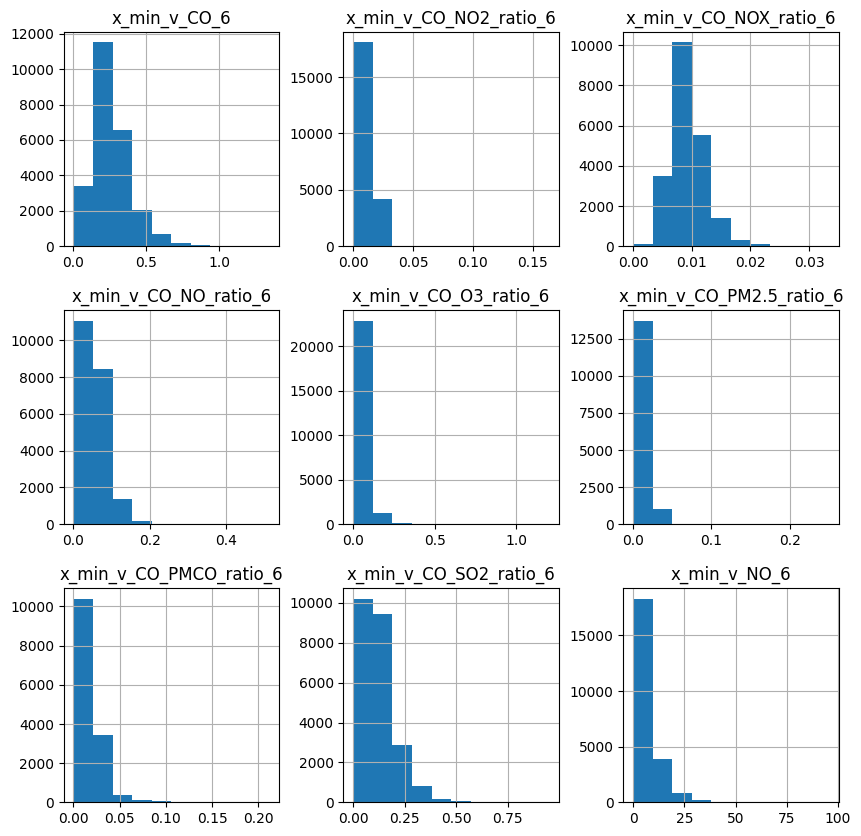

In [52]:
X[varc[:9]].hist(figsize=(10,10))  #hacemos histograma de 9 variables al azar

# Ausentes

In [53]:
miss = 1 - X[varc].describe().T[['count']] / len(X)

In [54]:
miss
#El valor 0.113560 significa que el 11.36% de los valores para la variable en cuestión son faltantes.

,count
x_min_v_CO_6,0.113560
x_min_v_CO_NO2_ratio_6,0.188191
x_min_v_CO_NOX_ratio_6,0.235492
x_min_v_CO_NO_ratio_6,0.235637
x_min_v_CO_O3_ratio_6,0.118381
...,...
x_max_v_SO2_NOX_ratio_6,0.188191
x_max_v_SO2_NO_ratio_6,0.188336
x_max_v_SO2_O3_ratio_6,0.074559
x_max_v_SO2_PM2.5_ratio_6,0.476748


In [55]:
X.shape, X.dropna().shape , X.dropna().shape[0] / X.shape[0] # si borramos los NaN d elos datos, perderiamos el 39% 
                                                             # de todos los datos, es mucho, por eso vamos a imputar

((27589, 130), (10769, 130), 0.3903367284062489)

# imputar

In [56]:
im = SimpleImputer(strategy='median')
#Imputar con la mediana significa que se reemplazarían los valores faltantes con el valor que ocupa 
#la posición central en un conjunto de datos ordenados de menor a mayor (o de mayor a menor).

In [57]:
im.fit(X[varc])

SimpleImputer(strategy='median')

In [58]:
X[varc] = im.transform(X[varc])

In [59]:
X.shape, X.dropna().shape , X.dropna().shape[0] / X.shape[0]

((27589, 130), (27589, 130), 1.0)

In [60]:
X

,id_station,ancla,x_min_v_CO_6,x_min_v_CO_NO2_ratio_6,x_min_v_CO_NOX_ratio_6,x_min_v_CO_NO_ratio_6,x_min_v_CO_O3_ratio_6,x_min_v_CO_PM2.5_ratio_6,x_min_v_CO_PMCO_ratio_6,x_min_v_CO_SO2_ratio_6,x_min_v_NO_6,x_min_v_NO2_6,x_min_v_NO2_CO_ratio_6,x_min_v_NO2_NOX_ratio_6,x_min_v_NO2_NO_ratio_6,x_min_v_NO2_O3_ratio_6,x_min_v_NO2_PM2.5_ratio_6,x_min_v_NO2_PMCO_ratio_6,x_min_v_NO2_SO2_ratio_6,x_min_v_NOX_6,x_min_v_NOX_CO_ratio_6,x_min_v_NOX_NO2_ratio_6,x_min_v_NOX_NO_ratio_6,x_min_v_NOX_O3_ratio_6,x_min_v_NOX_PM2.5_ratio_6,x_min_v_NOX_PMCO_ratio_6,x_min_v_NOX_SO2_ratio_6,x_min_v_NO_CO_ratio_6,x_min_v_NO_NO2_ratio_6,x_min_v_NO_NOX_ratio_6,x_min_v_NO_O3_ratio_6,x_min_v_NO_PM2.5_ratio_6,x_min_v_NO_PMCO_ratio_6,x_min_v_NO_SO2_ratio_6,x_min_v_O3_6,x_min_v_O3_CO_ratio_6,x_min_v_O3_NO2_ratio_6,x_min_v_O3_NOX_ratio_6,x_min_v_O3_NO_ratio_6,x_min_v_O3_PM2.5_ratio_6,x_min_v_O3_PMCO_ratio_6,x_min_v_O3_SO2_ratio_6,x_min_v_PM2.5_6,x_min_v_PM2.5_CO_ratio_6,x_min_v_PM2.5_NO2_ratio_6,x_min_v_PM2.5_NOX_ratio_6,x_min_v_PM2.5_NO_ratio_6,x_min_v_PM2.5_O3_ratio_6,x_min_v_PM2.5_PMCO_ratio_6,x_min_v_PM2.5_SO2_ratio_6,x_min_v_PMCO_6,x_min_v_PMCO_CO_ratio_6,x_min_v_PMCO_NO2_ratio_6,x_min_v_PMCO_NOX_ratio_6,x_min_v_PMCO_NO_ratio_6,x_min_v_PMCO_O3_ratio_6,x_min_v_PMCO_PM2.5_ratio_6,x_min_v_PMCO_SO2_ratio_6,x_min_v_SO2_6,x_min_v_SO2_CO_ratio_6,x_min_v_SO2_NO2_ratio_6,x_min_v_SO2_NOX_ratio_6,x_min_v_SO2_NO_ratio_6,x_min_v_SO2_O3_ratio_6,x_min_v_SO2_PM2.5_ratio_6,x_min_v_SO2_PMCO_ratio_6,x_max_v_CO_6,x_max_v_CO_NO2_ratio_6,x_max_v_CO_NOX_ratio_6,x_max_v_CO_NO_ratio_6,x_max_v_CO_O3_ratio_6,x_max_v_CO_PM2.5_ratio_6,x_max_v_CO_PMCO_ratio_6,x_max_v_CO_SO2_ratio_6,x_max_v_NO_6,x_max_v_NO2_6,x_max_v_NO2_CO_ratio_6,x_max_v_NO2_NOX_ratio_6,x_max_v_NO2_NO_ratio_6,x_max_v_NO2_O3_ratio_6,x_max_v_NO2_PM2.5_ratio_6,x_max_v_NO2_PMCO_ratio_6,x_max_v_NO2_SO2_ratio_6,x_max_v_NOX_6,x_max_v_NOX_CO_ratio_6,x_max_v_NOX_NO2_ratio_6,x_max_v_NOX_NO_ratio_6,x_max_v_NOX_O3_ratio_6,x_max_v_NOX_PM2.5_ratio_6,x_max_v_NOX_PMCO_ratio_6,x_max_v_NOX_SO2_ratio_6,x_max_v_NO_CO_ratio_6,x_max_v_NO_NO2_ratio_6,x_max_v_NO_NOX_ratio_6,x_max_v_NO_O3_ratio_6,x_max_v_NO_PM2.5_ratio_6,x_max_v_NO_PMCO_ratio_6,x_max_v_NO_SO2_ratio_6,x_max_v_O3_6,x_max_v_O3_CO_ratio_6,x_max_v_O3_NO2_ratio_6,x_max_v_O3_NOX_ratio_6,x_max_v_O3_NO_ratio_6,x_max_v_O3_PM2.5_ratio_6,x_max_v_O3_PMCO_ratio_6,x_max_v_O3_SO2_ratio_6,x_max_v_PM2.5_6,x_max_v_PM2.5_CO_ratio_6,x_max_v_PM2.5_NO2_ratio_6,x_max_v_PM2.5_NOX_ratio_6,x_max_v_PM2.5_NO_ratio_6,x_max_v_PM2.5_O3_ratio_6,x_max_v_PM2.5_PMCO_ratio_6,x_max_v_PM2.5_SO2_ratio_6,x_max_v_PMCO_6,x_max_v_PMCO_CO_ratio_6,x_max_v_PMCO_NO2_ratio_6,x_max_v_PMCO_NOX_ratio_6,x_max_v_PMCO_NO_ratio_6,x_max_v_PMCO_O3_ratio_6,x_max_v_PMCO_PM2.5_ratio_6,x_max_v_PMCO_SO2_ratio_6,x_max_v_SO2_6,x_max_v_SO2_CO_ratio_6,x_max_v_SO2_NO2_ratio_6,x_max_v_SO2_NOX_ratio_6,x_max_v_SO2_NO_ratio_6,x_max_v_SO2_O3_ratio_6,x_max_v_SO2_PM2.5_ratio_6,x_max_v_SO2_PMCO_ratio_6
0,ACO,6,0.237500,0.011357,0.008492,0.048563,0.021586,0.014485,0.015501,0.158333,2.000000,12.875000,59.054563,0.691393,4.255755,1.296302,1.049660,1.135187,9.666667,14.750000,77.395833,1.164429,5.253539,1.469520,1.476352,1.639889,11.152778,10.868056,0.173730,0.146759,0.187860,0.312032,0.372032,1.541667,9.041667,40.552579,0.603589,0.509111,4.970358,1.135298,1.310538,3.987847,13.708333,48.791667,0.696265,0.496108,2.999037,0.827809,0.932982,6.313228,12.000000,41.030423,0.633175,0.464996,2.751987,0.687169,0.686162,5.075000,1.125000,4.149802,0.071548,0.051578,0.336335,0.132601,0.079086,0.088163,0.383333,0.018796,0.016159,0.118056,0.171604,0.031743,0.034522,0.312500,14.958333,27.166667,100.508772,0.862210,6.625000,12.919710,2.121042,2.194900,17.625000,42.000000,122.675439,1.611333,7.611111,23.132911,3.460575,3.258981,25.895833,35.927083,0.612250,0.309070,10.260180,1.277502,1.195463,9.217965,15.791667,96.464912,1.490244,1.222494,7.659722,2.937369,3.160701,10.687500,26.820856,95.769737,1.266412,0.998347,9.673543,3.906823,1.878778,15.044094,22.826087,93.828314,1.24

# Validacion de distribucion alterada (que alteramos)

In [61]:
ks = pd.DataFrame( map( lambda v: (v , ks_2samp( tad[v].dropna() , X[v]  ).statistic ) , varc  ) , columns = ['var','ks']  )

In [62]:
pd.set_option('display.max_rows',200)

In [63]:
ks

,var,ks
0,x_min_v_CO_6,0.062704
1,x_min_v_CO_NO2_ratio_6,0.099588
2,x_min_v_CO_NOX_ratio_6,0.120568
3,x_min_v_CO_NO_ratio_6,0.118647
4,x_min_v_CO_O3_ratio_6,0.065822
5,x_min_v_CO_PM2.5_ratio_6,0.239112
6,x_min_v_CO_PMCO_ratio_6,0.242820
7,x_min_v_CO_SO2_ratio_6,0.079714
8,x_min_v_NO_6,0.085520
9,x_min_v_NO2_6,0.049321


In [64]:
# Para valores arriba de .1 se considera distribución alterada, por ende las volamos alv

In [65]:
alteradas = ks['var'].loc[ ks['ks'] > .1 ].to_list()

In [66]:
len(alteradas), alteradas  # 70 variables alteradas o rotas 

(70,
 ['x_min_v_CO_NOX_ratio_6',
  'x_min_v_CO_NO_ratio_6',
  'x_min_v_CO_PM2.5_ratio_6',
  'x_min_v_CO_PMCO_ratio_6',
  'x_min_v_NO2_CO_ratio_6',
  'x_min_v_NO2_PM2.5_ratio_6',
  'x_min_v_NO2_PMCO_ratio_6',
  'x_min_v_NOX_CO_ratio_6',
  'x_min_v_NOX_PM2.5_ratio_6',
  'x_min_v_NOX_PMCO_ratio_6',
  'x_min_v_NOX_SO2_ratio_6',
  'x_min_v_NO_CO_ratio_6',
  'x_min_v_NO_PM2.5_ratio_6',
  'x_min_v_NO_PMCO_ratio_6',
  'x_min_v_NO_SO2_ratio_6',
  'x_min_v_O3_PM2.5_ratio_6',
  'x_min_v_O3_PMCO_ratio_6',
  'x_min_v_PM2.5_6',
  'x_min_v_PM2.5_CO_ratio_6',
  'x_min_v_PM2.5_NO2_ratio_6',
  'x_min_v_PM2.5_NOX_ratio_6',
  'x_min_v_PM2.5_NO_ratio_6',
  'x_min_v_PM2.5_O3_ratio_6',
  'x_min_v_PM2.5_PMCO_ratio_6',
  'x_min_v_PM2.5_SO2_ratio_6',
  'x_min_v_PMCO_6',
  'x_min_v_PMCO_CO_ratio_6',
  'x_min_v_PMCO_NO2_ratio_6',
  'x_min_v_PMCO_NOX_ratio_6',
  'x_min_v_PMCO_NO_ratio_6',
  'x_min_v_PMCO_O3_ratio_6',
  'x_min_v_PMCO_PM2.5_ratio_6',
  'x_min_v_PMCO_SO2_ratio_6',
  'x_min_v_SO2_PM2.5_ratio_6',
  'x_

In [68]:
varc = [ v for v in varc if v not in alteradas ] # quitamos las variables rotas

In [69]:
len(varc), varc  # ahora solo nos quedan 58, pero no alteras, es buen numero para trabajar

(58,
 ['x_min_v_CO_6',
  'x_min_v_CO_NO2_ratio_6',
  'x_min_v_CO_O3_ratio_6',
  'x_min_v_CO_SO2_ratio_6',
  'x_min_v_NO_6',
  'x_min_v_NO2_6',
  'x_min_v_NO2_NOX_ratio_6',
  'x_min_v_NO2_NO_ratio_6',
  'x_min_v_NO2_O3_ratio_6',
  'x_min_v_NO2_SO2_ratio_6',
  'x_min_v_NOX_6',
  'x_min_v_NOX_NO2_ratio_6',
  'x_min_v_NOX_NO_ratio_6',
  'x_min_v_NOX_O3_ratio_6',
  'x_min_v_NO_NO2_ratio_6',
  'x_min_v_NO_NOX_ratio_6',
  'x_min_v_NO_O3_ratio_6',
  'x_min_v_O3_6',
  'x_min_v_O3_CO_ratio_6',
  'x_min_v_O3_NO2_ratio_6',
  'x_min_v_O3_NOX_ratio_6',
  'x_min_v_O3_NO_ratio_6',
  'x_min_v_O3_SO2_ratio_6',
  'x_min_v_SO2_6',
  'x_min_v_SO2_CO_ratio_6',
  'x_min_v_SO2_NO2_ratio_6',
  'x_min_v_SO2_NOX_ratio_6',
  'x_min_v_SO2_NO_ratio_6',
  'x_min_v_SO2_O3_ratio_6',
  'x_max_v_CO_6',
  'x_max_v_CO_O3_ratio_6',
  'x_max_v_CO_SO2_ratio_6',
  'x_max_v_NO_6',
  'x_max_v_NO2_6',
  'x_max_v_NO2_CO_ratio_6',
  'x_max_v_NO2_NOX_ratio_6',
  'x_max_v_NO2_NO_ratio_6',
  'x_max_v_NO2_O3_ratio_6',
  'x_max_v_NO2_S

# Varianza

In [70]:
vt = VarianceThreshold(threshold=1)

In [71]:
vt.fit(X[varc])

VarianceThreshold(threshold=1)

In [72]:
sin_varianza = [ v for v,u in zip( varc , vt.get_support() ) if not(u)  ]

In [73]:
len(sin_varianza) , sin_varianza # ver variables sin varianza, tenemos 21

(21,
 ['x_min_v_CO_6',
  'x_min_v_CO_NO2_ratio_6',
  'x_min_v_CO_O3_ratio_6',
  'x_min_v_CO_SO2_ratio_6',
  'x_min_v_NO2_NOX_ratio_6',
  'x_min_v_NOX_NO2_ratio_6',
  'x_min_v_NO_NO2_ratio_6',
  'x_min_v_NO_NOX_ratio_6',
  'x_min_v_O3_NOX_ratio_6',
  'x_min_v_SO2_NO2_ratio_6',
  'x_min_v_SO2_NOX_ratio_6',
  'x_min_v_SO2_NO_ratio_6',
  'x_min_v_SO2_O3_ratio_6',
  'x_max_v_CO_6',
  'x_max_v_CO_O3_ratio_6',
  'x_max_v_CO_SO2_ratio_6',
  'x_max_v_NO2_NOX_ratio_6',
  'x_max_v_NOX_NO2_ratio_6',
  'x_max_v_NO_NO2_ratio_6',
  'x_max_v_NO_NOX_ratio_6',
  'x_max_v_SO2_NO2_ratio_6'])

array([[<Axes: title={'center': 'x_min_v_CO_6'}>,
        <Axes: title={'center': 'x_min_v_CO_NO2_ratio_6'}>,
        <Axes: title={'center': 'x_min_v_CO_O3_ratio_6'}>,
        <Axes: title={'center': 'x_min_v_CO_SO2_ratio_6'}>,
        <Axes: title={'center': 'x_min_v_NO2_NOX_ratio_6'}>],
       [<Axes: title={'center': 'x_min_v_NOX_NO2_ratio_6'}>,
        <Axes: title={'center': 'x_min_v_NO_NO2_ratio_6'}>,
        <Axes: title={'center': 'x_min_v_NO_NOX_ratio_6'}>,
        <Axes: title={'center': 'x_min_v_O3_NOX_ratio_6'}>,
        <Axes: title={'center': 'x_min_v_SO2_NO2_ratio_6'}>],
       [<Axes: title={'center': 'x_min_v_SO2_NOX_ratio_6'}>,
        <Axes: title={'center': 'x_min_v_SO2_NO_ratio_6'}>,
        <Axes: title={'center': 'x_min_v_SO2_O3_ratio_6'}>,
        <Axes: title={'center': 'x_max_v_CO_6'}>,
        <Axes: title={'center': 'x_max_v_CO_O3_ratio_6'}>],
       [<Axes: title={'center': 'x_max_v_CO_SO2_ratio_6'}>,
        <Axes: title={'center': 'x_max_v_NO2_NOX_ratio_

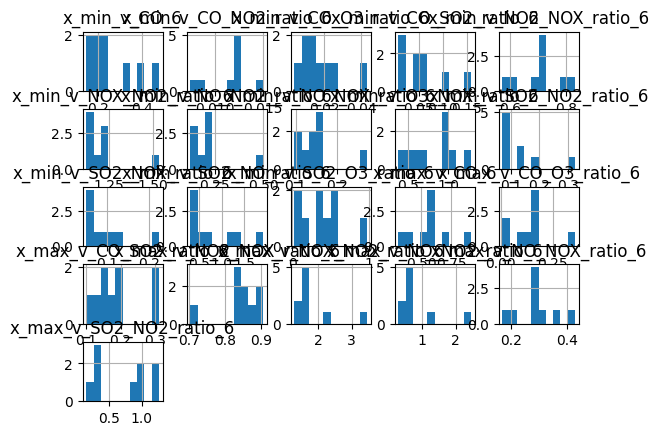

In [74]:
X[sin_varianza][:9].hist()

In [75]:
X.drop(sin_varianza, axis=1, inplace=True)

In [76]:
varc = [v for v in varc if v not in sin_varianza] #quitamos las de sin varianza

In [77]:
len(varc), varc # ahora solo nos quedan 37 valores

(37,
 ['x_min_v_NO_6',
  'x_min_v_NO2_6',
  'x_min_v_NO2_NO_ratio_6',
  'x_min_v_NO2_O3_ratio_6',
  'x_min_v_NO2_SO2_ratio_6',
  'x_min_v_NOX_6',
  'x_min_v_NOX_NO_ratio_6',
  'x_min_v_NOX_O3_ratio_6',
  'x_min_v_NO_O3_ratio_6',
  'x_min_v_O3_6',
  'x_min_v_O3_CO_ratio_6',
  'x_min_v_O3_NO2_ratio_6',
  'x_min_v_O3_NO_ratio_6',
  'x_min_v_O3_SO2_ratio_6',
  'x_min_v_SO2_6',
  'x_min_v_SO2_CO_ratio_6',
  'x_max_v_NO_6',
  'x_max_v_NO2_6',
  'x_max_v_NO2_CO_ratio_6',
  'x_max_v_NO2_NO_ratio_6',
  'x_max_v_NO2_O3_ratio_6',
  'x_max_v_NO2_SO2_ratio_6',
  'x_max_v_NOX_6',
  'x_max_v_NOX_NO_ratio_6',
  'x_max_v_NOX_O3_ratio_6',
  'x_max_v_NOX_SO2_ratio_6',
  'x_max_v_NO_O3_ratio_6',
  'x_max_v_NO_SO2_ratio_6',
  'x_max_v_O3_6',
  'x_max_v_O3_CO_ratio_6',
  'x_max_v_O3_NO2_ratio_6',
  'x_max_v_O3_NOX_ratio_6',
  'x_max_v_O3_NO_ratio_6',
  'x_max_v_O3_SO2_ratio_6',
  'x_max_v_SO2_6',
  'x_max_v_SO2_CO_ratio_6',
  'x_max_v_SO2_O3_ratio_6'])

# Valores extremos

In [79]:
ext = X[varc].describe(percentiles=[0.01,0.99]).T[['1%','99%']].reset_index()
for v, li, ls in ext.values:
    X[f'ol_{v}'] = ( (X[v] < li) | ( X[v] > ls) ).astype(int)
    
X['ext'] = X.filter(like='ol_').max(axis=1)
X.drop( X.filter(like='ol_').columns , axis=1 , inplace=True  )

In [80]:
X['ext'].value_counts(True)

0    0.758346
1    0.241654
Name: ext, dtype: float64

In [81]:
X[um] = tad[um]

In [82]:
X = X.loc[ X['ext'] == 0 ].reset_index(drop=True).drop(['ext'], axis=1)

# Analisis Bivariado

In [84]:
X[varc].corr()

,x_min_v_NO_6,x_min_v_NO2_6,x_min_v_NO2_NO_ratio_6,x_min_v_NO2_O3_ratio_6,x_min_v_NO2_SO2_ratio_6,x_min_v_NOX_6,x_min_v_NOX_NO_ratio_6,x_min_v_NOX_O3_ratio_6,x_min_v_NO_O3_ratio_6,x_min_v_O3_6,x_min_v_O3_CO_ratio_6,x_min_v_O3_NO2_ratio_6,x_min_v_O3_NO_ratio_6,x_min_v_O3_SO2_ratio_6,x_min_v_SO2_6,x_min_v_SO2_CO_ratio_6,x_max_v_NO_6,x_max_v_NO2_6,x_max_v_NO2_CO_ratio_6,x_max_v_NO2_NO_ratio_6,x_max_v_NO2_O3_ratio_6,x_max_v_NO2_SO2_ratio_6,x_max_v_NOX_6,x_max_v_NOX_NO_ratio_6,x_max_v_NOX_O3_ratio_6,x_max_v_NOX_SO2_ratio_6,x_max_v_NO_O3_ratio_6,x_max_v_NO_SO2_ratio_6,x_max_v_O3_6,x_max_v_O3_CO_ratio_6,x_max_v_O3_NO2_ratio_6,x_max_v_O3_NOX_ratio_6,x_max_v_O3_NO_ratio_6,x_max_v_O3_SO2_ratio_6,x_max_v_SO2_6,x_max_v_SO2_CO_ratio_6,x_max_v_SO2_O3_ratio_6
x_min_v_NO_6,1.000000,0.635847,-0.373685,0.699840,0.105867,0.882961,-0.372676,0.814661,0.817831,-0.190398,-0.288958,-0.340760,-0.339266,-0.282232,0.353383,0.049636,0.617727,0.491246,0.064351,-0.383637,0.465931,0.061208,0.626484,-0.382281,0.540235,0.211288,0.523872,0.303724,-0.263144,-0.394423,-0.472596,-0.505670,-0.464688,-0.384929,0.174734,0.032482,0.289301
x_min_v_NO2_6,0.635847,1.000000,-0.039306,0.633763,0.169608,0.880891,-0.037662,0.523627,0.434440,-0.020066,-0.204210,-0.396485,-0.215786,-0.231861,0.405125,0.116730,0.489283,0.727996,0.297317,0.035642,0.517554,0.236138,0.624029,0.036810,0.430907,0.218406,0.373783,0.150206,-0.029718,-0.289943,-0.593347,-0.548918,-0.256878,-0.292993,0.229758,0.105918,0.310746
x_min_v_NO2_NO_ratio_6,-0.373685,-0.039306,1.000000,-0.245325,0.027095,-0.217481,0.999333,-0.268111,-0.262301,0.492148,0.414587,0.339692,0.693143,0.297272,-0.051875,0.102142,-0.494810,-0.146521,0.115221,0.615822,-0.353196,0.015601,-0.389599,0.615415,-0.432545,-0.216749,-0.434704,-0.413937,0.415861,0.382705,0.232214,0.328514,0.563573,0.297477,-0.065966,0.002640,-0.179950
x_min_v_NO2_O3_ratio_6,0.699840,0.633763,-0.245325,1.000000,0.065641,0.699942,-0.244454,0.876804,0.779836,-0.271942,-0.303613,-0.339094,-0.276538,-0.332995,0.312788,0.021275,0.512720,0.468644,0.068929,-0.175048,0.635062,0.084117,0.523531,-0.174246,0.577671,0.178342,0.536718,0.241112,-0.341361,-0.392814,-0.445747,-0.423601,-0.364361,-0.413216,0.185378,0.026040,0.371472
x_min_v_NO2_SO2_ratio_6,0.105867,0.169608,0.027095,0.065641,1.000000,0.156297,0.027985,0.068540,0.061779,0.023321,-0.025083,-0.034058,-0.008241,0.387972,-0.331269,-0.341624,-0.046131,0.038057,-0.018200,0.015544,0.010213,0.514627,-0.017266,0.016058,-0.020736,0.447492,-0.033658,0.295299,0.041137,-0.065017,-0.123883,-0.112500,-0.008119,0.294970,-0.570308,-0.543160,-0.363455
x_min_v_NOX_6,0.882961,0.880891,-0.217481,0.699942,0.156297,1.000000,-0.215809,0.725884,0.664371,-0.108279,-0.263052,-0.395822,-0.305059,-0.265939,0.401662,0.081194,0.604263,0.659922,0.205946,-0.152715,0.515518,0.177147,0.689779,-0.150919,0.531429,0.245339,0.488563,0.250543,-0.138941,-0.361604,-0.570323,-0.590647,-0.386133,-0.352411,0.218730,0.072833,0.326348
x_min_v_NOX_NO_ratio_6,-0.372676,-0.037662,0.999333,-0.244454,0.027985,-0.215809,1.000000,-0.267356,-0.261786,0.491966,0.413400,0.337713,0.691566,0.296616,-0.051780,0.102110,-0.493969,-0.144980,0.114937,0.614076,-0.352655,0.016421,-0.388221,0.614047,-0.432186,-0.215519,-0.434513,-0.413024,0.415076,0.380695,0.230339,0.324814,0.562704,0.296516,-0.065743,0.002544,-0.179207
x_min_v_NOX_O3_ratio_6,0.814661,0.523627,-0.268111,0.876804,0.068540,0.725884,-0.267356,1.000000,0.964789,-0.234653,-0.269374,-0.283647,-0.251164,-0.294013,0.308355,0.017938,0.544520,0.385923,0.027299,-0.223436,0.528794,0.040233,0.527482,-0.222517,0.595808,0.180145,0.571674,0.275692,-0.301164,-0.357384,-0.383128,-0.378841,-0.352457,-0.379600,0.162614,0.009026,0.338544
x_min_v_NO_O3_ratio_6,0.817831,0.434440,-0.262301,0.779836,0.061779,0.664371,-0.261786,0.964789,1.000000,-0.190750,-0.224692,-0.222524,-0.207686,-0.247621,0.278836,0.015146,0.511088,0.314130,-0.011484,-0.244811,0.448957,0.001110,0.475855,-0.244188,0.542085,0.152287,0.534541,0.264282,-0.256720,-0.307

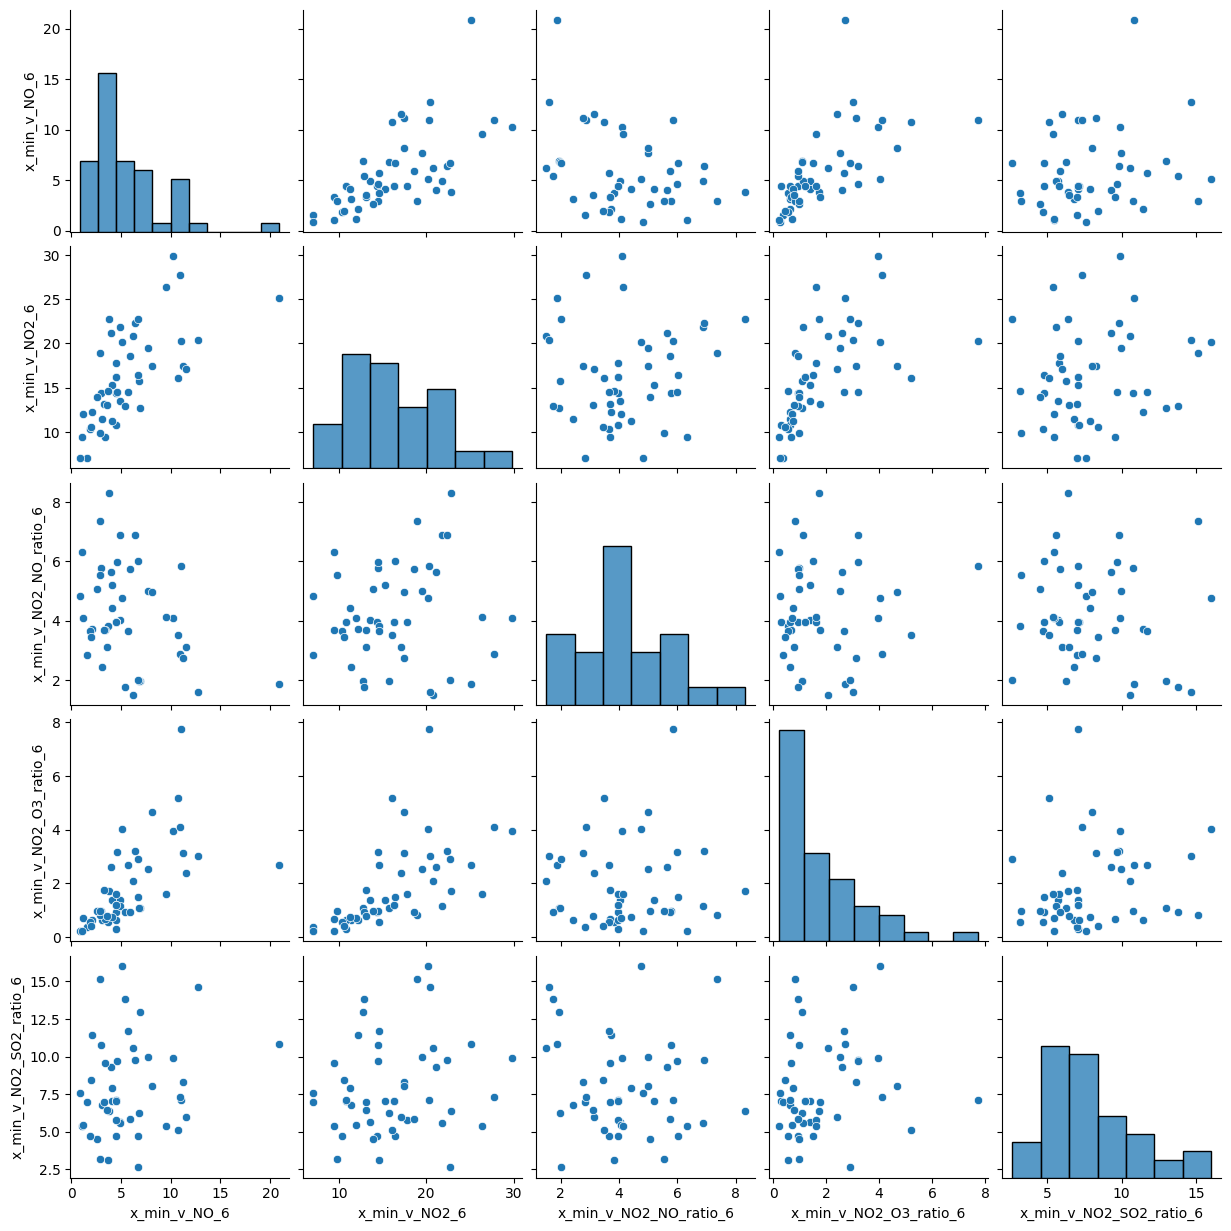

In [86]:
sns.pairplot( X[  varc[:5]   ].sample(50) )